In [ ]:
# ✅ Libraries and Frameworks
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# **1️⃣ Reading data**

In [ ]:
athletes_df = pd.read_csv('/content/athlete_events.csv')


In [ ]:
regions_df = pd.read_excel('/content/noc_regions.xlsx')

# **2️⃣ Data Cleaning**

In [ ]:
# Drop duplicate records
athletes_df.drop_duplicates(inplace=True)
regions_df.drop_duplicates(inplace=True)

In [ ]:
# Check for missing values in both datasets
athletes_df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9315
Height,58814
Weight,61527
Team,0
NOC,0
Games,0
Year,0


In [ ]:
# Check for missing values in both datasets
regions_df.isnull().sum()

,0
NOC,0
region,3
notes,209


In [ ]:
# check for data type
athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      269731 non-null  int64  
 1   Name    269731 non-null  object 
 2   Sex     269731 non-null  object 
 3   Age     260416 non-null  float64
 4   Height  210917 non-null  float64
 5   Weight  208204 non-null  float64
 6   Team    269731 non-null  object 
 7   NOC     269731 non-null  object 
 8   Games   269731 non-null  object 
 9   Year    269731 non-null  int64  
 10  Season  269731 non-null  object 
 11  City    269731 non-null  object 
 12  Sport   269731 non-null  object 
 13  Event   269731 non-null  object 
 14  Medal   39772 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 32.9+ MB


In [ ]:
regions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


# ----------------------------------------------------------
# Fill missing values in athlete data
# ----------------------------------------------------------


In [ ]:
# For Age, Height, and Weight, fill missing values with the median (common practice)
athletes_df['Age'] = athletes_df['Age'].fillna(athletes_df['Age'].median())
athletes_df['Height'] = athletes_df['Height'].fillna(athletes_df['Height'].median())
athletes_df['Weight'] = athletes_df['Weight'].fillna(athletes_df['Weight'].median())

# ----------------------------------------------------------
# Replace missing Medal entries with "No Medal"
# ----------------------------------------------------------

In [ ]:
# Replace missing Medal entries with "No Medal"
athletes_df['Medal'] = athletes_df['Medal'].fillna('No Medal')

# ----------------------------------------------------------
# Merge athletes data with region names using NOC code
# ----------------------------------------------------------

In [ ]:
athletes_df = athletes_df.merge(regions_df, on='NOC', how='left')

# ----------------------------------------------------------
# Fill missing values in athlete data (Region and notes)
# ----------------------------------------------------------

In [ ]:
athletes_df['region'] = athletes_df['region'].fillna('Unknown')

In [ ]:
athletes_df['notes'] = athletes_df['notes'].fillna('No Notes')

In [ ]:
athletes_df.isnull().sum()


,0
ID,0
Name,0
Sex,0
Age,0
Height,0
Weight,0
Team,0
NOC,0
Games,0
Year,0


In [ ]:
athletes_df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal,China,No Notes
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal,China,No Notes
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No Medal,Denmark,No Notes
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,No Notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No Notes
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,Netherlands,No Notes
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No Notes
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,Netherlands,No Notes
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal,Netherlands,No Notes
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal,Netherlands,No Notes


# **3️⃣ Data Preparation for Star Schema**

### **📝 Dimension 1: Athletes**

In [ ]:
# ----------------------------------------------
# 🏋️ Dimension Table: DimAthletes
# ----------------------------------------------
dim_athletes = athletes_df[['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight']].drop_duplicates()
dim_athletes = dim_athletes.rename(columns={'ID': 'AthleteID'})

In [ ]:
# Show dim_athletes
dim_athletes.head()

,AthleteID,Name,Sex,Age,Height,Weight
0,1,A Dijiang,M,24.0,180.0,80.0
1,2,A Lamusi,M,23.0,170.0,60.0
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,70.0
3,4,Edgar Lindenau Aabye,M,34.0,175.0,70.0
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0


### **📝 Dimension 2: Games**

In [ ]:
# ----------------------------------------------
# 🏟️ Dimension Table: DimGames
# ----------------------------------------------
dim_games = athletes_df[['Games', 'Year', 'Season', 'City']].drop_duplicates().reset_index(drop=True)
dim_games['GameID'] = dim_games.index + 1  # Create surrogate key

In [ ]:
# Show dim_games
dim_games.head()

,Games,Year,Season,City,GameID
0,1992 Summer,1992,Summer,Barcelona,1
1,2012 Summer,2012,Summer,London,2
2,1920 Summer,1920,Summer,Antwerpen,3
3,1900 Summer,1900,Summer,Paris,4
4,1988 Winter,1988,Winter,Calgary,5


### **📝 Dimension 3: Sports**

In [ ]:
# ----------------------------------------------
# 🏅 Dimension Table: DimSports
# ----------------------------------------------
dim_sports = athletes_df[['Sport']].drop_duplicates().reset_index(drop=True)
dim_sports['SportID'] = dim_sports.index + 1

In [ ]:
# Show dim_sports
dim_sports.head()

,Sport,SportID
0,Basketball,1
1,Judo,2
2,Football,3
3,Tug-Of-War,4
4,Speed Skating,5


### **📝 Dimension 4: Events**

In [ ]:
# ----------------------------------------------
# 🏆 Dimension Table: DimEvents
# ----------------------------------------------
dim_events = athletes_df[['Event','Sport']].drop_duplicates().reset_index(drop=True)

# Merge with sports to assign SportID
dim_events = dim_events.merge(dim_sports, on='Sport')
dim_events['EventID'] = dim_events.index + 1
dim_events_cleaned = dim_events.drop('Sport', axis=1)

In [ ]:
# Show dim_events
dim_events_cleaned.head()

,Event,SportID,EventID
0,Basketball Men's Basketball,1,1
1,Judo Men's Extra-Lightweight,2,2
2,Football Men's Football,3,3
3,Tug-Of-War Men's Tug-Of-War,4,4
4,Speed Skating Women's 500 metres,5,5


### **📝 Dimension 5: Countries**

In [ ]:
# ----------------------------------------------
# 🌍 Dimension Table: DimCountries
# ----------------------------------------------
dim_countries = athletes_df[['NOC', 'region', 'notes']].drop_duplicates()

In [ ]:
# Show dim_countries
dim_countries.head()

,NOC,region,notes
0,CHN,China,No Notes
2,DEN,Denmark,No Notes
4,NED,Netherlands,No Notes
10,USA,USA,No Notes
28,FIN,Finland,No Notes


## **🔥 Create Fact Table**

In [ ]:
# ----------------------------------------------
# 📊 Fact Table: FactResults
# ----------------------------------------------

# Merge to assign GameID
fact_df = athletes_df.merge(dim_games, on=['Games', 'Year', 'Season', 'City'])
# Merge to assign EventID
fact_df = fact_df.merge(dim_events, on=['Event', 'Sport'])

fact_results = fact_df[['ID', 'GameID', 'EventID', 'NOC', 'Medal']].drop_duplicates()
fact_results = fact_results.rename(columns={'ID': 'AthleteID'})
fact_results['ResultID'] = fact_results.index + 1

In [ ]:
fact_results.head()

,AthleteID,GameID,EventID,NOC,Medal,ResultID
0,1,1,1,CHN,No Medal,1
1,2,2,2,CHN,No Medal,2
2,3,3,3,DEN,No Medal,3
3,4,4,4,DEN,Gold,4
4,5,5,5,NED,No Medal,5


# **✅ Step 4️⃣: Create SQLite Database & Tables**

### **1️⃣ Create a database file**

In [ ]:
# Create a new database connection
conn = sqlite3.connect('olympics.db')
cursor = conn.cursor()

print("✅ Connected to SQLite database.")

✅ Connected to SQLite database.


## **✅ CREATE TABLE statements**

### **🔵 Dimension Tables**

In [ ]:
# Create DimAthletes table
cursor.execute("""
CREATE TABLE IF NOT EXISTS DimAthletes (
    AthleteID INTEGER PRIMARY KEY,
    Name TEXT,
    Sex TEXT,
    Age INTEGER,
    Height REAL,
    Weight REAL
);
""")

# Create DimGames table
cursor.execute("""
CREATE TABLE IF NOT EXISTS DimGames (
    GameID INTEGER PRIMARY KEY,
    Games TEXT,
    Year INTEGER,
    Season TEXT,
    City TEXT
);
""")

# Create DimSports table
cursor.execute("""
CREATE TABLE IF NOT EXISTS DimSports (
    SportID INTEGER PRIMARY KEY,
    Sport TEXT
);
""")

# Create DimEvents table
cursor.execute("""
CREATE TABLE IF NOT EXISTS DimEvents (
    EventID INTEGER PRIMARY KEY,
    Event TEXT,
    SportID INTEGER,
    FOREIGN KEY (SportID) REFERENCES DimSports(SportID)
);
""")

# Create DimCountries table
cursor.execute("""
CREATE TABLE IF NOT EXISTS DimCountries (
    NOC TEXT PRIMARY KEY,
    Region TEXT,
    Notes TEXT
);
""")

### **🟨 Fact Table**

In [ ]:
# Create FactResults table
cursor.execute("""
CREATE TABLE IF NOT EXISTS FactResults (
    ResultID INTEGER PRIMARY KEY,
    AthleteID INTEGER,
    GameID INTEGER,
    EventID INTEGER,
    NOC TEXT,
    Medal TEXT,
    FOREIGN KEY (AthleteID) REFERENCES DimAthletes(AthleteID),
    FOREIGN KEY (GameID) REFERENCES DimGames(GameID),
    FOREIGN KEY (EventID) REFERENCES DimEvents(EventID),
    FOREIGN KEY (NOC) REFERENCES DimCountries(NOC)
);
""")


**✅ We save the changes**

In [ ]:
# Commit changes and close the connection temporarily
conn.commit()
print("✅ Tables created successfully.")

✅ Tables created successfully.


# **# ✅ Step 5️⃣ : Load data into SQLite database (INSERT into tables)**

In [ ]:
# ----------------------------------------------------------
# 5.2 Insert Cleaned Data into SQLite Database
# ----------------------------------------------------------

# 📝 Important:
# We use 'replace' to avoid duplicate primary key issues.
# This will delete old data and insert fresh data each time we run it.

# ----------------------------------------------------------
# Insert Dimension Tables
# ----------------------------------------------------------

# Insert DimAthletes
dim_athletes.to_sql('DimAthletes', conn, if_exists='replace', index=False)
print("✅ DimAthletes loaded successfully.")

# Insert DimGames
dim_games.to_sql('DimGames', conn, if_exists='replace', index=False)
print("✅ DimGames loaded successfully.")

# Insert DimSports
dim_sports.to_sql('DimSports', conn, if_exists='replace', index=False)
print("✅ DimSports loaded successfully.")

# Insert DimEvents
dim_events_cleaned.to_sql('DimEvents', conn, if_exists='replace', index=False)
print("✅ dim_events_cleaned loaded successfully.")

# Insert DimCountries
dim_countries.to_sql('DimCountries', conn, if_exists='replace', index=False)
print("✅ DimCountries loaded successfully.")

# ----------------------------------------------------------
# Insert Fact Table
# ----------------------------------------------------------

fact_results.to_sql('FactResults', conn, if_exists='replace', index=False)
print("✅ FactResults loaded successfully.")

# ----------------------------------------------------------
print("🎉 All data inserted into SQLite database successfully.")

✅ DimAthletes loaded successfully.
✅ DimGames loaded successfully.
✅ DimSports loaded successfully.
✅ dim_events_cleaned loaded successfully.
✅ DimCountries loaded successfully.
✅ FactResults loaded successfully.
🎉 All data inserted into SQLite database successfully.


# **6️⃣ Data Analysis using SQL (via Python)**

In [ ]:
# ----------------------------------------------------------
# Query 1️⃣: Top 10 countries with the most gold medals
# ----------------------------------------------------------

query_1 = """
SELECT c.Region AS Country, COUNT(*) AS GoldMedals
FROM FactResults f
JOIN DimCountries c ON f.NOC = c.NOC
WHERE f.Medal = 'Gold'
GROUP BY c.Region
ORDER BY GoldMedals DESC
LIMIT 10;
"""

gold_medals_df = pd.read_sql(query_1, conn)
print("🏅 Top 10 countries with the most gold medals:")
gold_medals_df

🏅 Top 10 countries with the most gold medals:


,Country,GoldMedals
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,677
4,Italy,575
5,France,499
6,Sweden,479
7,Canada,463
8,Hungary,432
9,Norway,378


In [ ]:
# ----------------------------------------------------------
# Query 2️⃣: Age distribution of athletes by sport
# ----------------------------------------------------------

query_2 = """
SELECT s.Sport, AVG(a.Age) AS AverageAge, MIN(a.Age) AS Youngest, MAX(a.Age) AS Oldest
FROM FactResults f
JOIN DimAthletes a ON f.AthleteID = a.AthleteID
JOIN DimEvents e ON f.EventID = e.EventID
JOIN DimSports s ON e.SportID = s.SportID
GROUP BY s.Sport
ORDER BY AverageAge;
"""

age_distribution_df = pd.read_sql(query_2, conn)
print("\n📊 Age distribution by sport:")
age_distribution_df


📊 Age distribution by sport:


,Sport,AverageAge,Youngest,Oldest
0,Rhythmic Gymnastics,19.059302,13.0,30.0
1,Swimming,21.379125,11.0,54.0
2,Figure Skating,22.770638,11.0,52.0
3,Diving,22.865165,12.0,51.0
4,Synchronized Swimming,22.885424,15.0,40.0
...,...,...,...,...
61,Shooting,33.527105,15.0,72.0
62,Polo,34.709091,21.0,53.0
63,Equestrianism,35.410090,16.0,72.0
64,Art Competitions,42.596873,14.0,97.0


In [ ]:
# ----------------------------------------------------------
# Query 3️⃣: Top 10 athletes with the most total medals
# ----------------------------------------------------------

query_3 = """
SELECT a.Name, COUNT(*) AS TotalMedals
FROM FactResults f
JOIN DimAthletes a ON f.AthleteID = a.AthleteID
WHERE f.Medal != 'No Medal'
GROUP BY a.Name
ORDER BY TotalMedals DESC
LIMIT 10;
"""

top_athletes_df = pd.read_sql(query_3, conn)
print("\n🥇 Top 10 athletes with the most medals:")
top_athletes_df


🥇 Top 10 athletes with the most medals:


,Name,TotalMedals
0,"Michael Fred Phelps, II",140
1,Ole Einar Bjrndalen,78
2,Birgit Fischer-Schmidt,72
3,Edoardo Mangiarotti,65
4,"Theodora Elisabeth Gerarda ""Anky"" van Grunsven",63
5,Merlene Joyce Ottey-Page,63
6,"Dara Grace Torres (-Hoffman, -Minas)",60
7,Aladr Gerevich (-Gerei),60
8,Larysa Semenivna Latynina (Diriy-),54
9,Claudia Pechstein,54


In [ ]:
# ----------------------------------------------------------
# Query 4️⃣: Cities that hosted Winter Olympics
# ----------------------------------------------------------

query_4 = """
SELECT City
FROM DimGames
GROUP BY City
HAVING COUNT(DISTINCT Season) = 1
   AND MAX(Season) = 'Winter';
"""


cities_df = pd.read_sql(query_4, conn)
print("\n🏙️ Cities that hosted Winter Olympics:")
cities_df



🏙️ Cities that hosted Winter Olympics:


,City
0,Albertville
1,Calgary
2,Chamonix
3,Cortina d'Ampezzo
4,Garmisch-Partenkirchen
5,Grenoble
6,Innsbruck
7,Lake Placid
8,Lillehammer
9,Nagano


In [ ]:
# ----------------------------------------------------------
# Query 5️⃣: Trend of athlete participation over the years
# ----------------------------------------------------------

query_5 = """
SELECT g.Year, COUNT(DISTINCT f.AthleteID) AS Participants
FROM FactResults f
JOIN DimGames g ON f.GameID = g.GameID
GROUP BY g.Year
ORDER BY g.Year;
"""

participation_trend_df = pd.read_sql(query_5, conn)
print("\n📈 Athlete participation trend over the years:")
participation_trend_df


📈 Athlete participation trend over the years:


,Year,Participants
0,1896,176
1,1900,1224
2,1904,650
3,1906,841
4,1908,2024
5,1912,2409
6,1920,2676
7,1924,3565
8,1928,3703
9,1932,2174


# **✅ Visualization 1: Top 10 countries with the most gold medals**

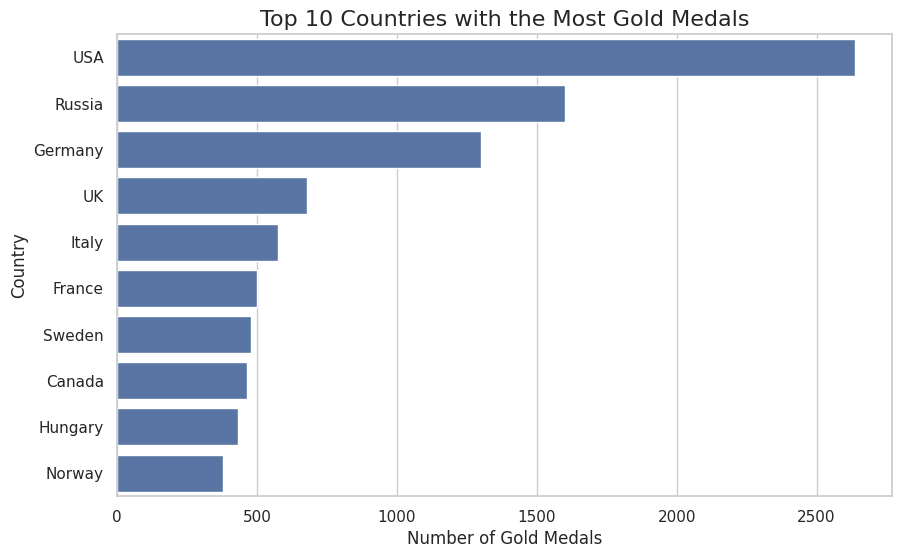

In [ ]:
# Set style
sns.set(style="whitegrid")

# ----------------------------
# Plot 1: Top 10 Countries - Gold Medals
# ----------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=gold_medals_df, x='GoldMedals', y='Country')

plt.title('Top 10 Countries with the Most Gold Medals', fontsize=16)
plt.xlabel('Number of Gold Medals')
plt.ylabel('Country')

plt.show()

<ipython-input-39-dc366cedb7df>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


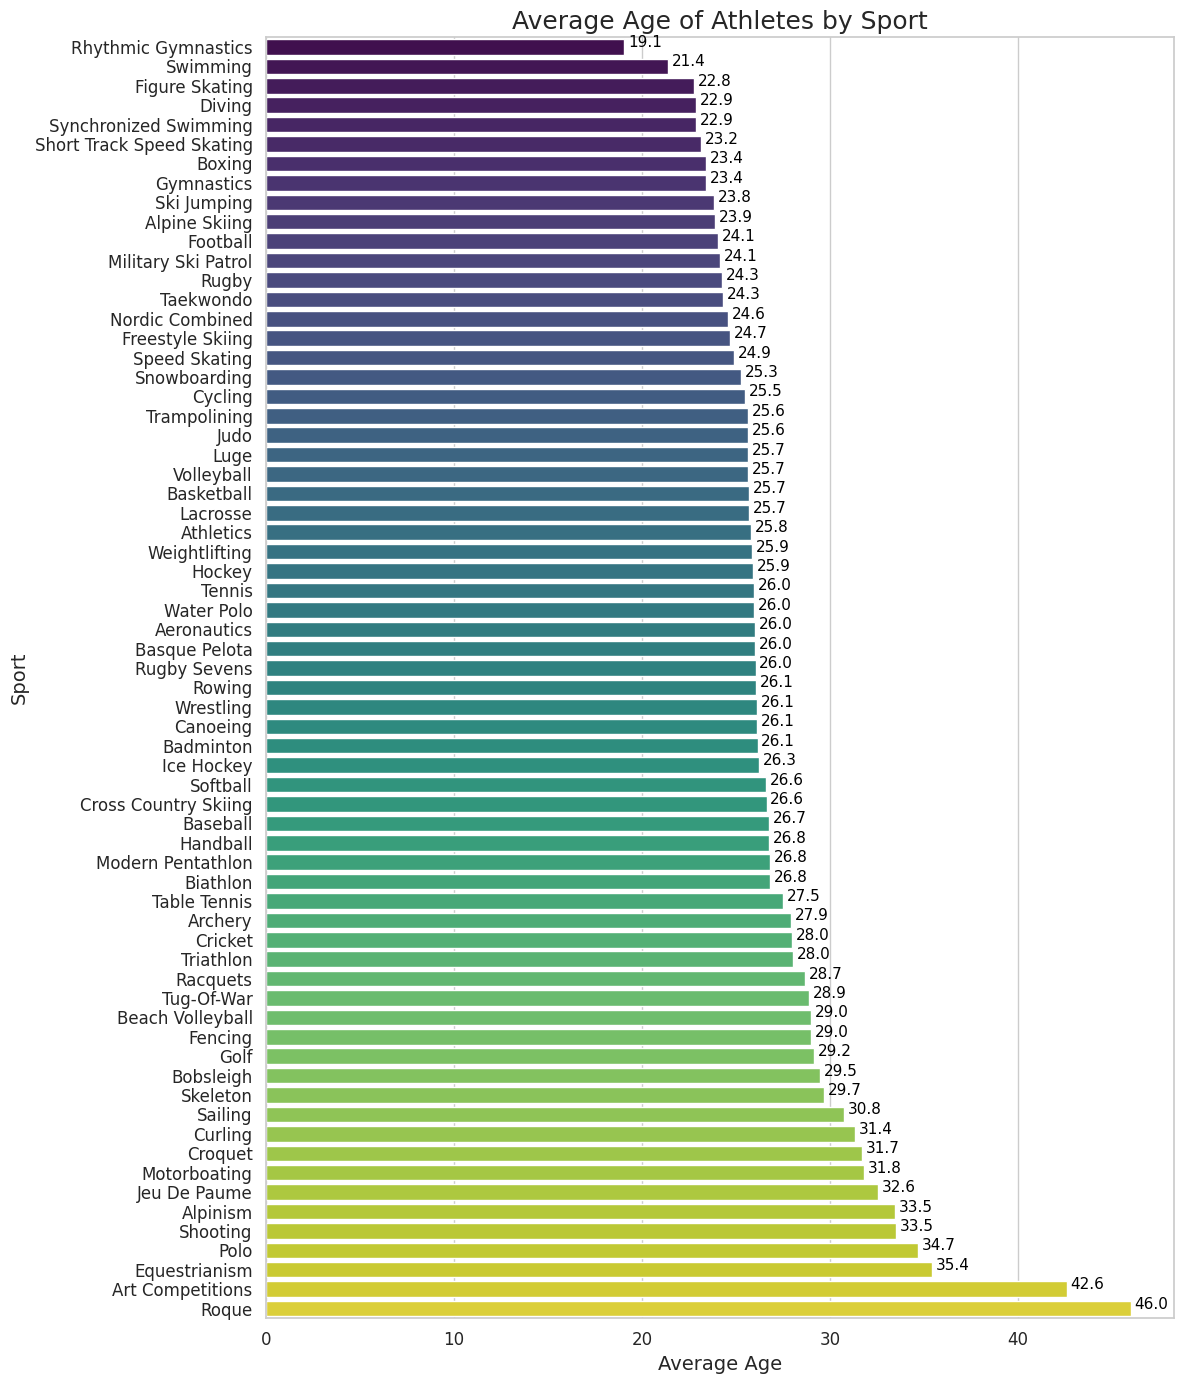

In [ ]:
plt.figure(figsize=(12, 14))

barplot = sns.barplot(
    data=age_distribution_df,
    x='AverageAge',
    y='Sport',
    palette='viridis'
)

plt.title('Average Age of Athletes by Sport', fontsize=18)
plt.xlabel('Average Age', fontsize=14)
plt.ylabel('Sport', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# ------------------------------
# Adding value labels above bars
# ------------------------------
for index, value in enumerate(age_distribution_df['AverageAge']):
    barplot.text(
        value + 0.2,
        index,
        round(value, 1),
        color='black',
        fontsize=11
    )

plt.tight_layout()
plt.show()


<ipython-input-40-0f0caf833697>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_athletes_df, x='TotalMedals', y='Name', palette='magma')


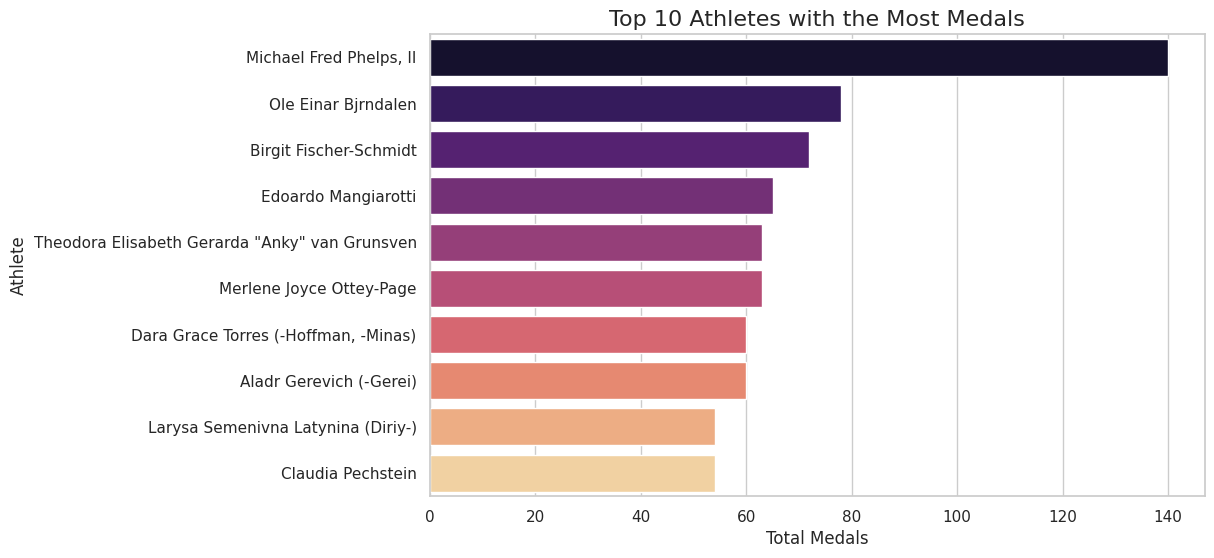

In [ ]:
# ----------------------------
# Plot 3: Top 10 Athletes by Total Medals
# ----------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=top_athletes_df, x='TotalMedals', y='Name', palette='magma')

plt.title('Top 10 Athletes with the Most Medals', fontsize=16)
plt.xlabel('Total Medals')
plt.ylabel('Athlete')

plt.show()


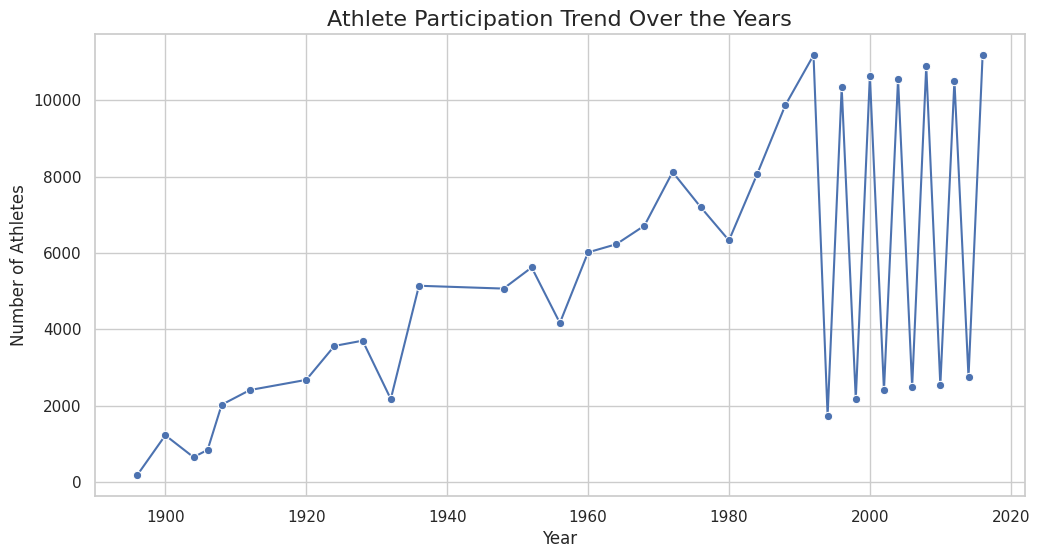

In [ ]:
# ----------------------------
# Plot 5: Athlete Participation Trend Over the Years
# ----------------------------
plt.figure(figsize=(12,6))
sns.lineplot(data=participation_trend_df, x='Year', y='Participants', marker='o')

plt.title('Athlete Participation Trend Over the Years', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Athletes')

plt.show()


In [ ]:
query_8 = """

select e.Event as Event_name , count(*) as Number_of_Participants
from DimEvents e join FactResults f on e.EventID = f.EventID
group by e.Event
order by count(*) desc
limit 10;
"""
Event_Number_of_Participants = pd.read_sql(query_8, conn)
Event_Number_of_Participants

,Event_name,Number_of_Participants
0,Football Men's Football,5733
1,Ice Hockey Men's Ice Hockey,4762
2,Hockey Men's Hockey,3958
3,Water Polo Men's Water Polo,3358
4,Basketball Men's Basketball,3280
5,"Cycling Men's Road Race, Individual",2947
6,Gymnastics Men's Individual All-Around,2500
7,Rowing Men's Coxed Eights,2423
8,Gymnastics Men's Team All-Around,2411
9,Handball Men's Handball,2264


<ipython-input-54-f6184564f858>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Event_Number_of_Participants, x='Event_name', y='Number_of_Participants', palette='viridis')


Text(0.5, 1.0, 'Top 10 Events with the Most Participants')

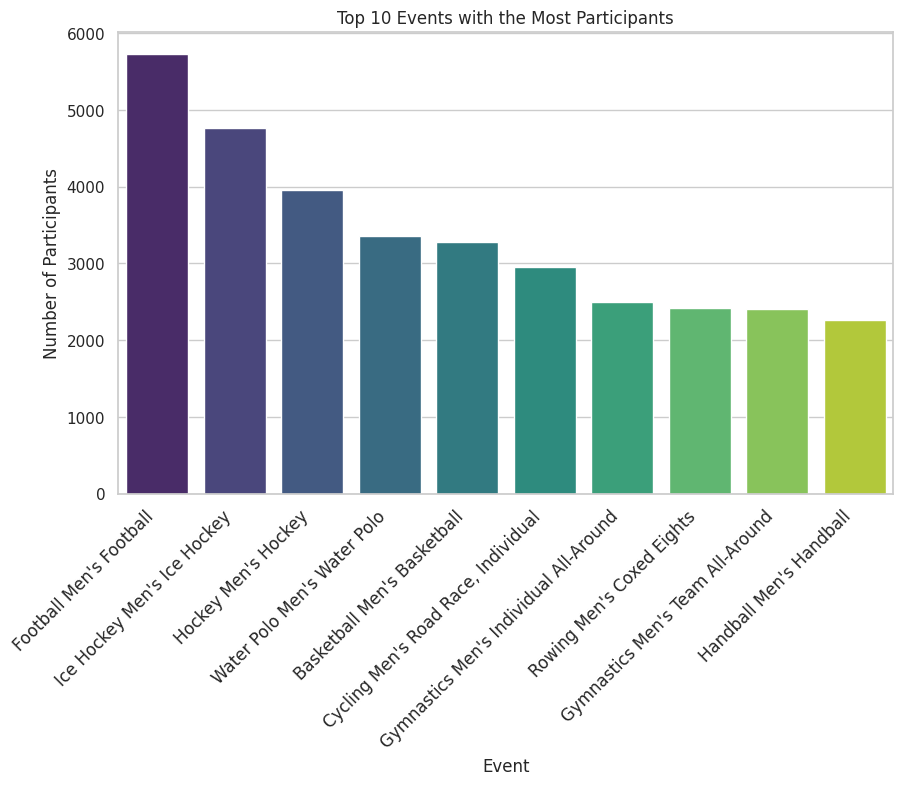

In [ ]:

plt.figure(figsize=(10,6))
sns.barplot(data=Event_Number_of_Participants, x='Event_name', y='Number_of_Participants', palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Event')
plt.ylabel('Number of Participants')
plt.title('Top 10 Events with the Most Participants')